In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
import pandas as pd
from IPython import display

In [3]:
file = open("psi0.txt", "r")
psi0 = file.read()
file.close()
psi0 = psi0.split(", ")
del psi0[-1]
for i, el in enumerate(psi0):
    psi0[i] = float(el)

N = int(np.sqrt(len(psi0)))

psi0 = np.asarray(psi0)
psi0 = psi0.reshape(N, N)
psi0.shape

(11, 11)

In [4]:
x = np.linspace(0, 10, N)
y = np.linspace(0, 10, N)

x, y = np.meshgrid(x, y)
x.shape

(11, 11)

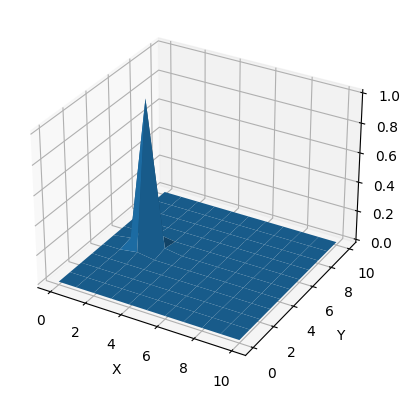

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot = ax.plot_surface(x, y, psi0)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()